In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load all datasets
cust = pd.read_csv("/workspaces/Telecom-Customer-Churn-Prediction-Retention-Strategy/Dataset/Customer_Info.csv")
loc  = pd.read_csv("/workspaces/Telecom-Customer-Churn-Prediction-Retention-Strategy/Dataset/Location_Data.csv")
online = pd.read_csv("/workspaces/Telecom-Customer-Churn-Prediction-Retention-Strategy/Dataset/Online_Services.csv")
pay = pd.read_csv("/workspaces/Telecom-Customer-Churn-Prediction-Retention-Strategy/Dataset/Payment_Info.csv")
service = pd.read_csv("/workspaces/Telecom-Customer-Churn-Prediction-Retention-Strategy/Dataset/Service_Options.csv")
status = pd.read_csv("/workspaces/Telecom-Customer-Churn-Prediction-Retention-Strategy/Dataset/Status_Analysis.csv")

# Problem Statement

The company operates in the telecom industry with a subscription-based business model. However, the company currently lacks a data-driven system to identify customers who are at high risk of churning. Without this capability, the marketing and customer service teams cannot prioritize at-risk customers, personalize retention strategies, or allocate marketing resources efficiently. As a result, the business continues to experience revenue loss, increasing customer acquisition costs, and declining customer lifetime value.

**Business Objectives**
1. Identify key factors influencing churn across demographics, service usage, contract type, satisfaction, and payment behavior.
2. Build a reliable churn prediction model to classify customers based on their likelihood to churn.

**Business Value**
- Reduce churn through targeted retention initiatives,
- Improve customer experience and satisfaction,
- Enhance Customer Lifetime Value (CLTV),
- Increase overall retention and operational efficiency.



# Dataset Overview
For this project, the dataset used is from Kaggle:

“Why Do Customers Leave? Can You Spot the Churners?”

Source: https://www.kaggle.com/datasets/hassanelfattmi/why-do-customers-leave-can-you-spot-the-churners?select=Status_Analysis.csv

In [2]:
# merge all on customer_id
df = cust.merge(loc, on="customer_id", how="left") \
         .merge(online, on="customer_id", how="left") \
         .merge(pay, on="customer_id", how="left") \
         .merge(service, on="customer_id", how="left") \
         .merge(status, on="customer_id", how="left")

df.head()

,customer_id,gender,age,under_30,senior_citizen,partner,dependents,number_of_dependents,married,country,...,referred_a_friend,number_of_referrals,satisfaction_score,cltv,customer_status,churn_score,churn_label,churn_value,churn_category,churn_reason
0,0002-ORFBO,Female,37,No,No,Yes,No,0,Yes,United States,...,Yes,2,3,2205,Stayed,65,No,0,Not Applicable,NaN
1,0003-MKNFE,Male,46,No,No,No,No,0,No,United States,...,No,0,5,5414,Stayed,66,No,0,Not Applicable,NaN
2,0004-TLHLJ,Male,50,No,No,No,No,0,No,United States,...,No,0,1,4479,Churned,71,Yes,1,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,No,Yes,Yes,No,0,Yes,United States,...,Yes,1,1,3714,Churned,91,Yes,1,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,No,Yes,Yes,No,0,Yes,United States,...,Yes,3,1,3464,Churned,68,Yes,1,Dissatisfaction,Network reliability


In [3]:
# Check format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        7043 non-null   object 
 1   gender                             7043 non-null   object 
 2   age                                7043 non-null   int64  
 3   under_30                           7043 non-null   object 
 4   senior_citizen                     7043 non-null   object 
 5   partner                            7043 non-null   object 
 6   dependents                         7043 non-null   object 
 7   number_of_dependents               7043 non-null   int64  
 8   married                            7043 non-null   object 
 9   country                            7043 non-null   object 
 10  state                              7043 non-null   object 
 11  city                               7043 non-null   objec

In [4]:
# Chek anomaly value on numeric column
for col in df.columns:
    print(f"======= {col} =======")
    display(df[col].value_counts())
    print()

======= customer_id =======


customer_id
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: count, Length: 7043, dtype: int64


======= gender =======


gender
Male      3555
Female    3488
Name: count, dtype: int64


======= age =======


age
42    156
47    153
40    150
44    148
23    146
     ... 
80     66
78     63
66     63
67     61
72     58
Name: count, Length: 62, dtype: int64


======= under_30 =======


under_30
No     5642
Yes    1401
Name: count, dtype: int64


======= senior_citizen =======


senior_citizen
No     5901
Yes    1142
Name: count, dtype: int64


======= partner =======


partner
No     3641
Yes    3402
Name: count, dtype: int64


======= dependents =======


dependents
No     5416
Yes    1627
Name: count, dtype: int64


======= number_of_dependents =======


number_of_dependents
0    5416
1     553
2     531
3     517
5      10
4       9
6       3
7       2
9       1
8       1
Name: count, dtype: int64


======= married =======


married
No     3641
Yes    3402
Name: count, dtype: int64


======= country =======


country
United States    7043
Name: count, dtype: int64


======= state =======


state
California    7043
Name: count, dtype: int64


======= city =======


city
Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Johannesburg          2
South Lake Tahoe      2
Jacumba               2
Holtville             2
Eldridge              2
Name: count, Length: 1106, dtype: int64


======= zip_code =======


zip_code
92028    43
92027    38
92122    36
92117    34
92126    32
         ..
93528     2
96150     2
91934     2
92105     2
93711     1
Name: count, Length: 1625, dtype: int64


======= total_population =======


total_population
42239    43
48690    38
34902    36
51213    34
74232    32
         ..
73006     2
207       2
8062      2
33038     2
36274     1
Name: count, Length: 1569, dtype: int64


======= latitude =======


latitude
33.362575    43
33.141265    38
32.857230    36
32.825086    34
32.886925    32
             ..
35.363339     2
32.741859     2
38.911577     2
32.649787     2
36.833002     1
Name: count, Length: 1626, dtype: int64


======= longitude =======


longitude
-117.299644    43
-116.967221    38
-117.209774    36
-117.199424    34
-117.152162    32
               ..
-117.090353     2
-117.637641     2
-120.106169     2
-116.223700     2
-119.829470     1
Name: count, Length: 1625, dtype: int64


======= phone_service_x =======


phone_service_x
Yes    6361
No      682
Name: count, dtype: int64


======= internet_service_x =======


internet_service_x
Yes    5517
No     1526
Name: count, dtype: int64


======= online_security =======


online_security
No     5024
Yes    2019
Name: count, dtype: int64


======= online_backup =======


online_backup
No     4614
Yes    2429
Name: count, dtype: int64


======= device_protection =======


device_protection
No     4621
Yes    2422
Name: count, dtype: int64


======= premium_tech_support =======


premium_tech_support
No     4999
Yes    2044
Name: count, dtype: int64


======= streaming_tv =======


streaming_tv
No     4336
Yes    2707
Name: count, dtype: int64


======= streaming_movies =======


streaming_movies
No     4311
Yes    2732
Name: count, dtype: int64


======= streaming_music =======


streaming_music
No     4555
Yes    2488
Name: count, dtype: int64


======= internet_type =======


internet_type
Fiber Optic    3035
DSL            1652
Cable           830
Name: count, dtype: int64


======= contract =======


contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64


======= paperless_billing =======


paperless_billing
Yes    4171
No     2872
Name: count, dtype: int64


======= payment_method =======


payment_method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


======= monthly_ charges =======


monthly_ charges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
116.55     1
106.85     1
68.55      1
108.80     1
67.85      1
Name: count, Length: 1585, dtype: int64


======= avg_monthly_long_distance_charges =======


avg_monthly_long_distance_charges
0.00     682
18.26      7
30.07      6
45.92      6
30.09      6
        ... 
32.23      1
22.26      1
47.03      1
42.21      1
2.01       1
Name: count, Length: 3584, dtype: int64


======= total_charges =======


total_charges
20.20      11
19.75       9
19.90       8
20.05       8
19.65       8
           ..
829.55      1
625.65      1
462.80      1
251.25      1
3707.60     1
Name: count, Length: 6540, dtype: int64


======= total_refunds =======


total_refunds
0.00     6518
16.56       2
8.74        2
1.31        2
41.74       2
         ... 
31.90       1
12.07       1
37.37       1
48.59       1
10.20       1
Name: count, Length: 500, dtype: int64


======= total_extra_data_charges =======


total_extra_data_charges
0      6315
10      138
40       62
30       58
20       51
80       47
100      44
50       43
150      42
130      40
140      38
60       36
90       35
70       34
110      32
120      28
Name: count, dtype: int64


======= total_long_distance_charges =======


total_long_distance_charges
0.00       682
15.60        4
48.96        4
22.86        4
597.60       3
          ... 
200.75       1
217.62       1
2288.43      1
1417.68      1
142.04       1
Name: count, Length: 6068, dtype: int64


======= total_revenue =======


total_revenue
24.80      3
116.27     3
68.41      3
66.56      3
3386.40    2
          ..
976.70     1
300.65     1
3258.42    1
1713.52    1
3707.60    1
Name: count, Length: 6975, dtype: int64


======= tenure =======


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


======= internet_service_y =======


internet_service_y
Yes    5517
No     1526
Name: count, dtype: int64


======= phone_service_y =======


phone_service_y
Yes    6361
No      682
Name: count, dtype: int64


======= multiple_lines =======


multiple_lines
No     4072
Yes    2971
Name: count, dtype: int64


======= avg_monthly_gb_download =======


avg_monthly_gb_download
0     1526
19     220
27     199
30     193
59     192
26     191
23     179
22     172
21     171
18     164
13     164
17     155
16     155
20     151
24     148
28     147
11     145
12     143
29     138
15     132
10     132
14     131
25     130
3      130
4      129
52     121
8      120
7      116
9      116
2      116
5      114
6      114
51      90
53      88
48      86
73      81
69      75
41      67
76      58
85      48
58      45
42      45
82      43
71      42
47      36
57      34
46      19
56      16
75      15
39       1
Name: count, dtype: int64


======= unlimited_data =======


unlimited_data
Yes    4745
No     2298
Name: count, dtype: int64


======= offer =======


offer
Offer B    824
Offer E    805
Offer D    602
Offer A    520
Offer C    415
Name: count, dtype: int64


======= referred_a_friend =======


referred_a_friend
No     3821
Yes    3222
Name: count, dtype: int64


======= number_of_referrals =======


number_of_referrals
0     3821
1     1086
5      264
3      255
7      248
9      238
2      236
4      236
10     223
6      221
8      213
11       2
Name: count, dtype: int64


======= satisfaction_score =======


satisfaction_score
3    2665
4    1789
5    1149
1     922
2     518
Name: count, dtype: int64


======= cltv =======


cltv
5546    8
4741    7
4745    7
4369    7
4115    7
       ..
4557    1
4833    1
4692    1
3327    1
5639    1
Name: count, Length: 3438, dtype: int64


======= customer_status =======


customer_status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64


======= churn_score =======


churn_score
91    202
80    150
71    148
77    145
67    142
     ... 
88     33
9       3
8       2
7       2
5       1
Name: count, Length: 81, dtype: int64


======= churn_label =======


churn_label
No     5174
Yes    1869
Name: count, dtype: int64


======= churn_value =======


churn_value
0    5174
1    1869
Name: count, dtype: int64


======= churn_category =======


churn_category
Not Applicable     5174
Competitor          841
Attitude            314
Dissatisfaction     303
Price               211
Other               200
Name: count, dtype: int64


======= churn_reason =======


churn_reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: c

In [5]:
df.describe()

,age,number_of_dependents,zip_code,total_population,latitude,longitude,monthly_ charges,avg_monthly_long_distance_charges,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,tenure,avg_monthly_gb_download,number_of_referrals,satisfaction_score,cltv,churn_score,churn_value
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.071134,22139.814568,36.197455,-119.756684,64.761692,22.958954,2280.381264,1.962182,6.860713,749.099262,3034.379056,32.371149,20.515405,1.951867,3.244924,4400.295755,58.505040,0.265370
std,16.750352,0.962802,1856.768045,21152.174407,2.468929,2.154425,30.090047,15.448113,2266.220462,7.902614,25.104978,846.660055,2865.204542,24.559481,20.418940,3.001199,1.201657,1183.057152,21.170031,0.441561
min,19.000000,0.000000,90001.000000,11.000000,32.555828,-124.301372,18.250000,0.000000,18.800000,0.000000,0.000000,0.000000,21.360000,0.000000,0.000000,0.000000,1.000000,2003.000000,5.000000,0.000000
25%,32.000000,0.000000,92101.000000,2344.000000,33.990646,-121.788090,35.500000,9.210000,400.150000,0.000000,0.000000,70.545000,605.610000,9.000000,3.000000,0.000000,3.000000,3469.000000,40.000000,0.000000
50%,46.000000,0.000000,93518.000000,17554.000000,36.205465,-119.595293,70.350000,22.890000,1394.550000,0.000000,0.000000,401.440000,2108.640000,29.000000,17.000000,0.000000,3.000000,4527.000000,61.000000,0.000000
75%,60.000000,0.000000,95329.000000,36125.000000,38.161321,-117.969795,89.850000,36.395000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,55.000000,27.000000,3.000000,4.000000,5380.500000,75.500000,1.000000
max,80.000000,9.000000,96150.000000,105285.000000,41.962127,-114.192901,118.750000,49.990000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,72.000000,85.000000,11.000000,5.000000,6500.000000,96.000000,1.000000


In [6]:
# Check duplicates
df.duplicated().sum()

0

In [7]:
# Check missing value
df.isnull().sum()

customer_id                             0
gender                                  0
age                                     0
under_30                                0
senior_citizen                          0
partner                                 0
dependents                              0
number_of_dependents                    0
married                                 0
country                                 0
state                                   0
city                                    0
zip_code                                0
total_population                        0
latitude                                0
longitude                               0
phone_service_x                         0
internet_service_x                      0
online_security                         0
online_backup                           0
device_protection                       0
premium_tech_support                    0
streaming_tv                            0
streaming_movies                  

In [8]:
# Missing value perentage
internet_type_missing = 100 * len(df[df['internet_type'].isnull()]) / len(df)
offer_missing = 100 * len(df[df['offer'].isnull()]) / len(df)
reason_missing = 100 * len(df[df['churn_reason'].isnull()]) / len(df)

print(f"Internet Type missing: {internet_type_missing:.2f}%")
print(f"Offer missing: {offer_missing:.2f}%")
print(f"Churn Reason missing: {reason_missing:.2f}%")

Internet Type missing: 21.67%
Offer missing: 55.05%
Churn Reason missing: 73.46%


**Data Dictionary**

| Column                            | Description                                  |
| --------------------------------- | -------------------------------------------- |
| customer_id                       | Unique ID for each customer                  |
| gender                            | Customer gender                              |
| age                               | Customer age (years)                         |
| under_30                          | Indicates if customer is under 30 (Yes/No)   |
| senior_citizen                    | Indicates if age ≥ 65 (Yes/No)               |
| partner                           | Customer has partner (Yes/No)                |
| dependents                        | Customer has dependents (Yes/No)             |
| number_of_dependents              | Number of dependents                         |
| married                           | Customer marriage status (Yes/No)            |
| country                           | Country of residence                         |
| state                             | State of residence                           |
| city                              | City of residence                            |
| zip_code                          | ZIP code                                     |
| total_population                  | ZIP code population estimate                 |
| latitude                          | Latitude coordinate                          |
| longitude                         | Longitude coordinate                         |
| phone_service_x                   | Phone service subscription indicator         |
| internet_service_x                | Internet service type                        |
| online_security                   | Subscription to online security add-on       |
| online_backup                     | Subscription to online backup add-on         |
| device_protection                 | Subscription to device protection plan       |
| premium_tech_support              | Subscription to premium tech support         |
| streaming_tv                      | Uses internet to stream TV                   |
| streaming_movies                  | Uses internet to stream movies               |
| streaming_music                   | Uses internet to stream music                |
| internet_type                     | Internet connection type (missing for ~22%)  |
| contract                          | Contract type                                |
| paperless_billing                 | Paperless billing indicator                  |
| payment_method                    | Method of payment                            |
| monthly_ charges                  | Monthly bill amount                          |
| avg_monthly_long_distance_charges | Avg. long-distance charges per month         |
| total_charges                     | Total lifetime charges                       |
| total_refunds                     | Total refunds issued                         |
| total_extra_data_charges          | Extra data charges                           |
| total_long_distance_charges       | Total long-distance charges                  |
| total_revenue                     | Total revenue contributed                    |
| tenure                            | Number of months subscribed                  |
| internet_service_y                | Duplicate internet service column            |
| phone_service_y                   | Duplicate phone service column               |
| multiple_lines                    | Has multiple telephone lines                 |
| avg_monthly_gb_download           | Average monthly GB downloaded                |
| unlimited_data                    | Unlimited data plan indicator                |
| offer                             | Last accepted marketing offer (missing ~55%) |
| referred_a_friend                 | Referred a friend (Yes/No)                   |
| number_of_referrals               | Total referrals                              |
| satisfaction_score                | Satisfaction score (1–5)                     |
| cltv                              | Customer Lifetime Value                      |
| customer_status                   | Stayed / Joined / Churned                    |
| churn_score                       | Churn likelihood score (0–100)               |
| churn_label                       | Churn status (Yes/No)                        |
| churn_value                       | Churn (1) or Not (0)                         |
| churn_category                    | Churn category                               |
| churn_reason                      | Reason for churn (missing ~73%)              |


Observations:
- The merged dataset contains 7,043 user records and 53 variables, combining customer demographics, location information, online & telecom services, payment & billing information, service options & usage, customer satisfaction and churn.
- Encoding method:
  - label encoding (binary): `gender`, `partner`, `dependents`, `married`, `phone_service_x`, `internet_service_x`, `online_security`, `online_backup`, `device_protection`, `premium_tech_support`, `streaming_tv`, `streaming_movie`, `streaming_music`, `paperless_billing`, `multiple_lines`, `unlimited_data`, `referred_a_friend`
  - One-hot encoding (>2): `contract`, `payment_method`
- There are some outliers in numeric columns -> RobustScaler
- There are duplicated column (phone_service_y and internet_service_y) -> drop.
- There were no duplicates found across the combined dataset. There were also no structural anomalies.
- Missing values exist:
  - internet_type (21.67%)
  - offer (55.05%)
  - churn_reason (73.46%)

  -> Missing values do not affect churn predictive model, so they can be droped.
- Additional dropping columns
  - `customer_id`, `country`, `state`, `city`, `zip_code`, `total_population`, `latitude`, `longitude`, `avg_monthly_gb_download`, `number_of_referrals` -> provides no predictive value.
  - `under_30`, `senior_citizen` -> Redundant with `age`
  - `customer_status`, `churn_category`, `churn_label`, `churn_score`-> Leakage risk


In [9]:
# Columns to drop
drop_cols = [
    "customer_id", "under_30", "senior_citizen",'avg_monthly_gb_download',
    "country", "state", "city", 'zip_code', 'total_population', 'latitude', 'longitude',
    "phone_service_y", "internet_service_y", 'number_of_referrals',
    "internet_type", "offer", "churn_reason",
    "customer_status", "churn_category", "churn_label", "churn_score"
]

predict = df.drop(columns=drop_cols)

# Train – Test split

In [10]:
from sklearn.model_selection import train_test_split

# Split into train/test
train_df, test_df = train_test_split(predict, test_size=0.2, random_state=42)

# Check shape
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (5634, 32)
Test shape: (1409, 32)


## Encoding

In [11]:
# Binary label encoding
binary_cols = [
    'gender', 'partner', 'dependents', 'married',
    'phone_service_x', 'internet_service_x', 'online_security',
    'online_backup', 'device_protection', 'premium_tech_support',
    'streaming_movies', 'streaming_tv', 'streaming_music', 'paperless_billing',
    'multiple_lines', 'unlimited_data', 'referred_a_friend'
]

# One-hot encoding
ohe_cols = ['contract', 'payment_method']

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

# Fit only on train set
for col in binary_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    label_encoders[col] = le

# Transform test set using the fitted encoders
for col in binary_cols:
    test_df[col] = label_encoders[col].transform(test_df[col])

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder — keep all categories
ohe = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')

# Fit on training data and transform both train/test
train_ohe = pd.DataFrame(
    ohe.fit_transform(train_df[ohe_cols]),
    columns=ohe.get_feature_names_out(ohe_cols),
    index=train_df.index
)

test_ohe = pd.DataFrame(
    ohe.transform(test_df[ohe_cols]),
    columns=ohe.get_feature_names_out(ohe_cols),
    index=test_df.index
)

# Drop old categorical columns and add new encoded columns
train_df = pd.concat([train_df.drop(ohe_cols, axis=1), train_ohe], axis=1)
test_df = pd.concat([test_df.drop(ohe_cols, axis=1), test_ohe], axis=1)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   gender                                    5634 non-null   int64  
 1   age                                       5634 non-null   int64  
 2   partner                                   5634 non-null   int64  
 3   dependents                                5634 non-null   int64  
 4   number_of_dependents                      5634 non-null   int64  
 5   married                                   5634 non-null   int64  
 6   phone_service_x                           5634 non-null   int64  
 7   internet_service_x                        5634 non-null   int64  
 8   online_security                           5634 non-null   int64  
 9   online_backup                             5634 non-null   int64  
 10  device_protection                      

# EDA


In [15]:
# Target (Churn) Distribution
churn_count = train_df['churn_value'].value_counts()
churn_count

churn_value
0    4138
1    1496
Name: count, dtype: int64

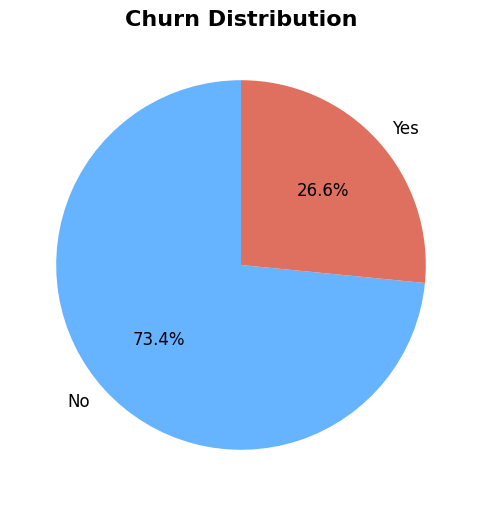

In [16]:
plt.figure(figsize=(6,6))

plt.pie(churn_count, labels=['No', 'Yes'], autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 12}, colors = ['#66b3ff', '#df705f'] )
plt.title('Churn Distribution', fontsize=16, fontweight='bold')
plt.show()

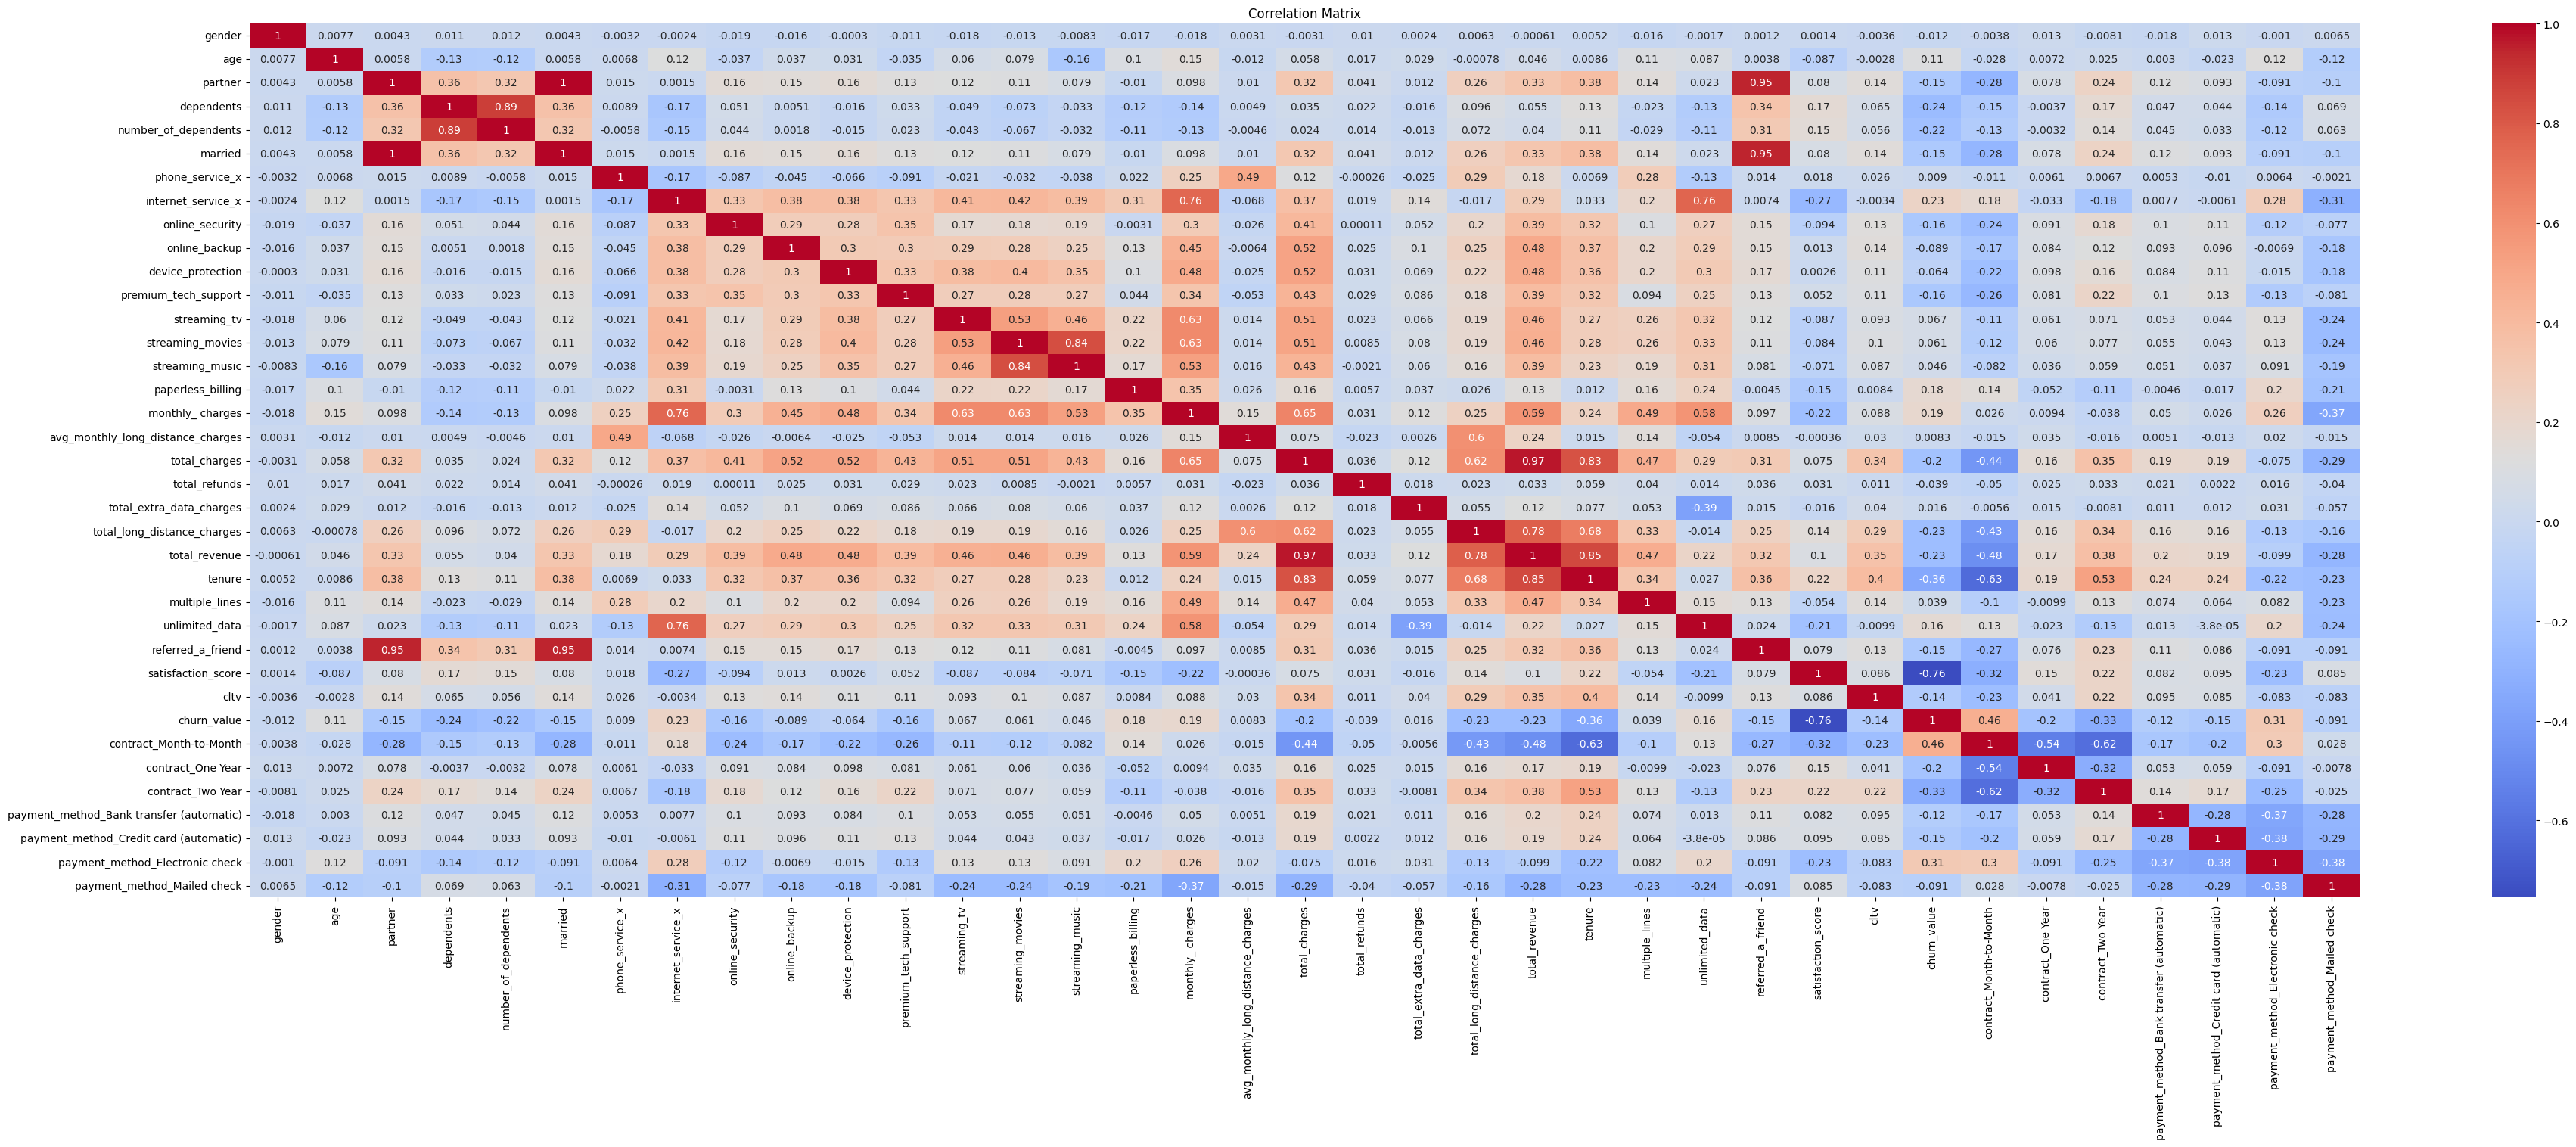

In [17]:
plt.figure(figsize=(45,15))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [18]:
corr = train_df.corr().abs()
high_corr = np.where(corr > 0.8)
high_pairs = [(corr.index[x], corr.columns[y], corr.iloc[x, y])
              for x, y in zip(*high_corr) if x != y and x < y]
high = pd.DataFrame(high_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
high

,Feature 1,Feature 2,Correlation
0,partner,married,1.000000
1,partner,referred_a_friend,0.946305
2,dependents,number_of_dependents,0.888657
3,married,referred_a_friend,0.946305
4,streaming_movies,streaming_music,0.840646
5,total_charges,total_revenue,0.972397
6,total_charges,tenure,0.825621
7,total_revenue,tenure,0.852047


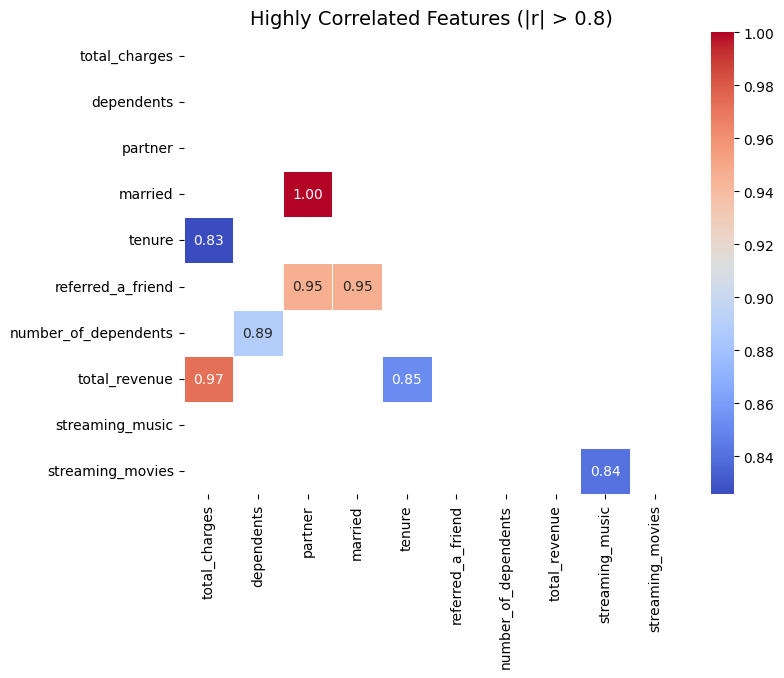

In [19]:
# Heatmap

# Set correlation threshold
threshold = 0.8

# Find pairs with correlation > threshold (and not self-correlated)
high_corr = np.where((abs(corr) > threshold) & (abs(corr) < 1))

# Extract pairs
pairs = [(corr.index[x], corr.columns[y], corr.iloc[x, y])
         for x, y in zip(*high_corr)]

# Get unique features involved in high correlations
high_corr_features = list(set([p[0] for p in pairs] + [p[1] for p in pairs]))

# Subset correlation matrix
corr_high = corr.loc[high_corr_features, high_corr_features]

# Filter the correlation matrix itself to only show high correlations
corr_masked = corr_high.where(abs(corr_high) > threshold)

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_masked,
    mask=np.triu(np.ones_like(corr_masked, dtype=bool)),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title(f'Highly Correlated Features (|r| > {threshold})', fontsize=14)
plt.show()

Drop redudant variables: `married`, `partner`, `dependent`, `streaming_movies`, `total_charges`, `total_revenue`

In [20]:
# Drop Redudant
drop_cols = ['married', 'partner', 'dependents', 'streaming_movies', 'total_charges', 'total_revenue']

train_df = train_df.drop(columns=drop_cols)
test_df = test_df.drop(columns=drop_cols)

In [21]:
corr_churn = train_df.corr()['churn_value'].sort_values(ascending=False)
corr_churn

churn_value                                 1.000000
contract_Month-to-Month                     0.459263
payment_method_Electronic check             0.312117
internet_service_x                          0.227943
monthly_ charges                            0.191447
paperless_billing                           0.180904
unlimited_data                              0.163736
age                                         0.113613
streaming_tv                                0.066657
streaming_music                             0.046218
multiple_lines                              0.038789
total_extra_data_charges                    0.016434
phone_service_x                             0.008997
avg_monthly_long_distance_charges           0.008348
gender                                     -0.011591
total_refunds                              -0.039138
device_protection                          -0.063832
online_backup                              -0.089382
payment_method_Mailed check                -0.

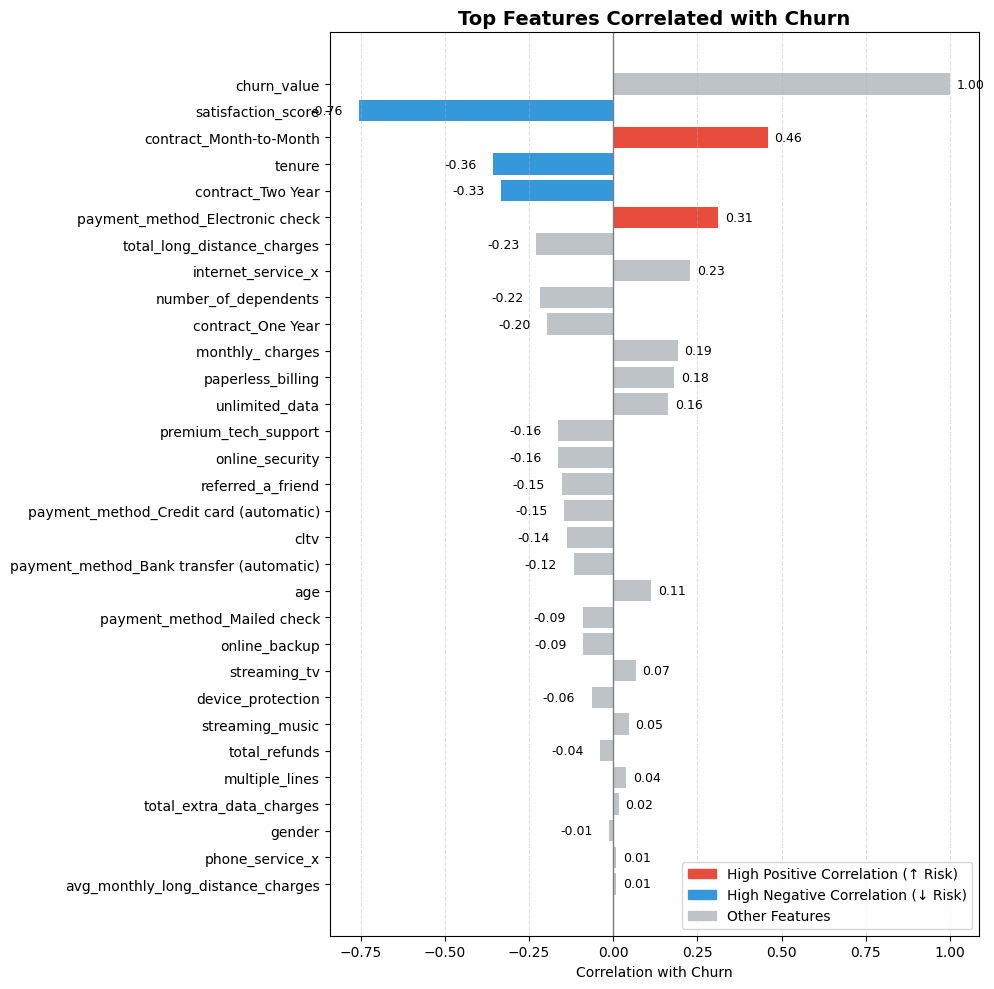

In [22]:
import matplotlib.patches as mpatches

# Compute correlation with Churn
corr_churn = train_df.corr(numeric_only=True)['churn_value']

# Sort by absolute correlation (descending so top features appear at top)
corr_churn = corr_churn.reindex(corr_churn.abs().sort_values(ascending=False).index)

# Define highlight features
highlight_features = [
    'dependents','number_of_referrals', 'contract_Two Year', 'tenure', 'satisfaction_score',
    'contract_Month-to-Month', 'payment_method_Electronic check'
]

# Set colors
colors = [
    '#E74C3C' if (f in highlight_features and corr_churn[f] > 0)
    else '#3498DB' if (f in highlight_features and corr_churn[f] < 0)
    else '#BDC3C7'
    for f in corr_churn.index
]

# Plot horizontal bar chart (reverse order so top features on top)
plt.figure(figsize=(10, 10))
bars = plt.barh(corr_churn.index[::-1], corr_churn.values[::-1], color=colors[::-1])

# Add correlation values beside bars
for i, (val, name) in enumerate(zip(corr_churn.values[::-1], corr_churn.index[::-1])):
    plt.text(val + (0.02 if val > 0 else -0.05), i, f"{val:.2f}",
             ha='left' if val > 0 else 'right', va='center', fontsize=9)

# Styling
plt.title('Top Features Correlated with Churn', fontsize=14, fontweight='bold')
plt.xlabel('Correlation with Churn')
plt.ylabel('')
plt.axvline(0, color='gray', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.4)

# Legend
legend_elements = [
    mpatches.Patch(color='#E74C3C', label='High Positive Correlation (↑ Risk)'),
    mpatches.Patch(color='#3498DB', label='High Negative Correlation (↓ Risk)'),
    mpatches.Patch(color='#BDC3C7', label='Other Features')
]
plt.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

Top 5 Key Features Drives Churn:
- satisfaction_score (-0.76)
- contract_Month-to-Month (0.46)
- tenure (-0.36)
- contract_Two Year (-0.33)
- payment_method_Electronic check (0.31)

# Modeling

**Algorithms to try:**
- Linear:
  - Logistic Regression
- Tree-Based:
  - Random Forest Classifier
  - XGBoost
  - LightGBM

**Metrics to focus:**
- Precision
- Recall
- F1-score
- ROC-AUC

## Feature Selection

In [23]:
# Features & target
X_train = train_df.drop('churn_value', axis=1)
X_test = test_df.drop('churn_value', axis=1)

y_train = train_df['churn_value']
y_test = test_df['churn_value']

Mutual Information (MI) is a statistical measure that tells us how much knowing one variable reduces uncertainty about another variable.
- The higher MI score -> the strong and useful feature to the target
- If a feature has low (or zero) MI score -> it does not help predict the target and can be removed without hurting the model

In [24]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train, y_train)
pd.Series(mi, index=X_train.columns).sort_values(ascending=False)

satisfaction_score                          0.407095
contract_Month-to-Month                     0.118607
tenure                                      0.072999
contract_Two Year                           0.072017
total_long_distance_charges                 0.052283
payment_method_Electronic check             0.046067
monthly_ charges                            0.045162
number_of_dependents                        0.041334
contract_One Year                           0.030674
internet_service_x                          0.027996
paperless_billing                           0.018007
unlimited_data                              0.017902
streaming_tv                                0.017032
payment_method_Bank transfer (automatic)    0.015593
streaming_music                             0.012021
online_security                             0.010938
referred_a_friend                           0.010162
payment_method_Credit card (automatic)      0.009679
premium_tech_support                        0.

<Axes: >

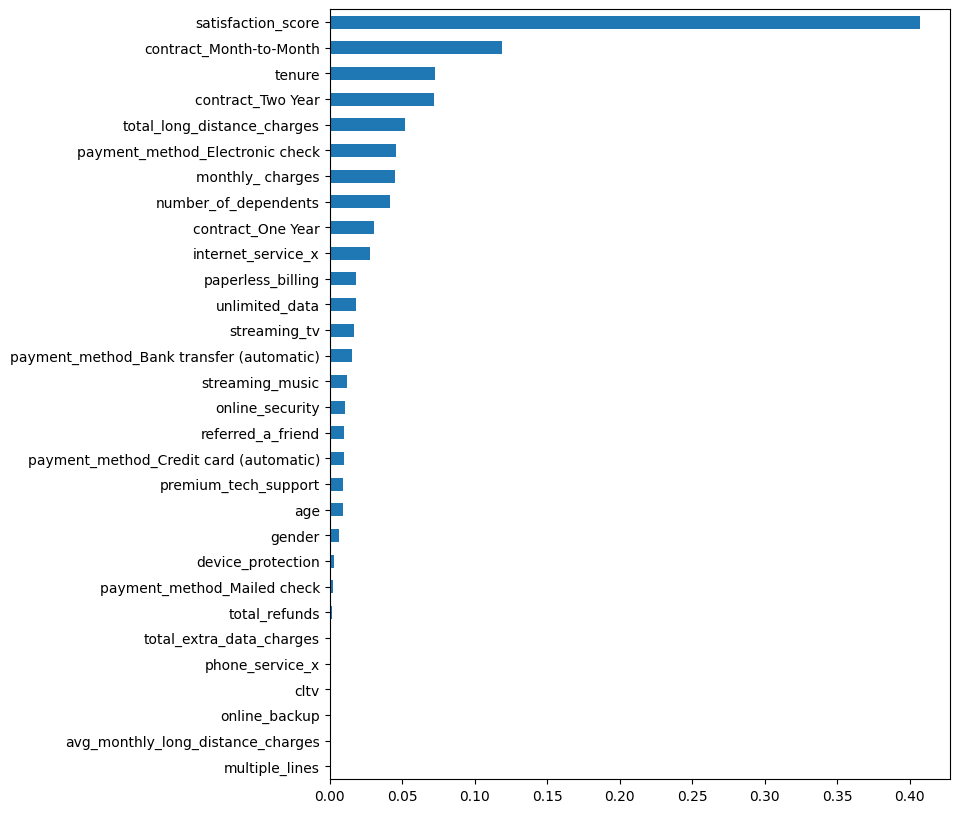

In [25]:
feat_imp = pd.Series(mi, index=X_train.columns).sort_values()
feat_imp.plot(kind="barh", figsize=(8,10))

In [26]:
# selected feature
selected_features = [
    'satisfaction_score', 'contract_Month-to-Month', 'tenure', 'contract_Two Year', 'total_long_distance_charges',
    'payment_method_Electronic check', 'monthly_ charges', 'number_of_dependents', 'contract_One Year', 'internet_service_x',
    'unlimited_data', 'online_security', 'paperless_billing', 'premium_tech_support', 'referred_a_friend',
    'payment_method_Credit card (automatic)', 'online_backup', 'payment_method_Bank transfer (automatic)', 'streaming_tv', 'age',
]

X_train = X_train[selected_features]
X_test = X_test[selected_features]

## Scaling

In [27]:
X_train.describe()

,satisfaction_score,contract_Month-to-Month,tenure,contract_Two Year,total_long_distance_charges,payment_method_Electronic check,monthly_ charges,number_of_dependents,contract_One Year,internet_service_x,unlimited_data,online_security,paperless_billing,premium_tech_support,referred_a_friend,payment_method_Credit card (automatic),online_backup,payment_method_Bank transfer (automatic),streaming_tv,age
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.00000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,3.248669,0.508520,32.373447,0.269613,751.455506,0.334043,64.815983,0.468939,0.221867,0.785588,0.680511,0.28541,0.600639,0.288605,0.459886,0.222755,0.346823,0.215477,0.383919,46.489350
std,1.205100,0.499972,24.655317,0.443798,852.793715,0.471697,30.127724,0.963110,0.415539,0.410451,0.466320,0.45165,0.489811,0.453154,0.498433,0.416132,0.476001,0.411190,0.486382,16.854406
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
25%,3.000000,0.000000,9.000000,0.000000,65.972500,0.000000,35.500000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
50%,3.000000,1.000000,29.000000,0.000000,385.650000,0.000000,70.325000,0.000000,0.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000
75%,4.000000,1.000000,56.000000,1.000000,1195.857500,1.000000,89.950000,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,60.000000
max,5.000000,1.000000,72.000000,1.000000,3564.720000,1.000000,118.750000,9.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000


In [28]:
from sklearn.preprocessing import RobustScaler

scale_cols = [
    'tenure',
    'total_long_distance_charges',
    'monthly_ charges',
    'number_of_dependents',
    'age'
]

# Initialize scaler
scaler = RobustScaler()

X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

## The Best Model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [30]:
# Define Base Models (Without Tuning)
#Logistic Regression
lr = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)

# Random Forest
rf = RandomForestClassifier(random_state=42, class_weight="balanced")

# XGBoost
xgb = XGBClassifier(class_weight="balanced", use_label_encoder=False, eval_metric="logloss", random_state=42)

# LightGBM
lgbm = LGBMClassifier(random_state=42, class_weight="balanced")

### Hyperparameter Tuning

#### Logistic Regression

In [31]:
# Hyperparameter grid
param_grid_lr = {
    "C": [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"],
    'class_weight': [None, 'balanced']
}

# GridSearchCV
grid_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    scoring="recall",               # note: we use recall
    cv=5,
    n_jobs=-1
)
grid_lr.fit(X_train, y_train)

# Best estimator
best_lr = grid_lr.best_estimator_
best_lr

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [32]:
# Tuned Model
tuned_lr = LogisticRegression(C=1, class_weight='balanced', max_iter=1000, random_state=42)

#### Random Forest Classifier

In [33]:
# Hyperparameter Grid
param_grid_rf = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5),
    'class_weight': [None, 'balanced']
}

# GridSearchCV
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring="recall",               # note: we use recall
    cv=5,
    n_jobs=-1
)
grid_rf.fit(X_train, y_train)

# Best estimator
best_rf = grid_rf.best_estimator_
best_rf

,n_estimators,20
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
# Tuned Model
tuned_rf = RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=20,
                       random_state=42)

#### XGBoost

In [35]:
# Hyperparameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    "subsample": [0.8, 1]
}

# GridSearchCV
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring="recall",               # note: we use recall
    cv=5,
    n_jobs=-1
)
grid_xgb.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:47:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:47:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:47:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:47:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:47:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:47:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:47:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:47:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,estimator,"XGBClassifier...obs=None, ...)"
,param_grid,"{'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], 'n_estimators': [100, 200, ...], 'subsample': [0.8, 1]}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [36]:
# the compact results
cv_results_xgb = pd.DataFrame(grid_xgb.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_results_xgb = cv_results_xgb[retain_cols].sort_values(by='rank_test_score')
cv_results_xgb

,params,mean_test_score,rank_test_score
54,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.897059,1
71,"{'learning_rate': 0.2, 'max_depth': 10, 'n_est...",0.895712,2
43,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.895050,3
52,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.895050,3
65,"{'learning_rate': 0.2, 'max_depth': 7, 'n_esti...",0.895048,5
...,...,...,...
5,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.786082,68
3,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.768033,69
2,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.768033,69
1,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est...",0.768033,69


In [37]:
# Tuned Model
tuned_xgb = XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8)

#### LightGBM

In [38]:
# Hyperparameter grid
param_grid_lgbm = {
    'n_estimators': [200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [15, 31],
    'class_weight': [None, 'balanced']
}

# GridSearchCV
grid_lgbm = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    scoring="recall",               # note: we use recall
    cv=5,
    n_jobs=-1
)
grid_lgbm.fit(X_train, y_train)

# Best estimator
best_lgbm = grid_lgbm.best_estimator_
best_lgbm

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1197, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265587 -> initscore=-1.017130
[LightGBM] [Info] Start training from score -1.017130
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1197, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1196, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265365 -> initscore=-1.018268
[LightGBM] [Info] Start training from score -1.018268
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1197, number of negative: 3311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

,boosting_type,'gbdt'
,num_leaves,15
,max_depth,-1
,learning_rate,0.05
,n_estimators,200
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [39]:
# Tuned model
tuned_lgbm = LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=200,
               num_leaves=15, random_state=42)

### Model Evaluation

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.base import clone

In [41]:
# Evaluate models on TRAIN sets
models = {
    "Logistic Regression (Base)": lr,
    "Logistic Regression (Tuned)": tuned_lr,
    "Random Forest (Base)": rf,
    "Random Forest (Tuned)": tuned_rf,
    "XGBoost (Base)": xgb,
    "XGBoost (Tuned)": tuned_xgb,
    "LightGBM (Base)": lgbm,
    "LightGBM (Tuned)": tuned_lgbm
}

results = []

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
  print(f"\nEvaluating {name}...")

  prec_scores, rec_scores, f1_scores, auc_scores = [], [], [], []

  # Cross-validation loop
  for train_idx, val_idx in cv.split(X_train, y_train):
      X_train_, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
      y_train_, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

      # Fit model
      model.fit(X_train_, y_train_)
      y_pred = model.predict(X_val)

      # Metrics
      prec_scores.append(precision_score(y_val, y_pred))
      rec_scores.append(recall_score(y_val, y_pred))
      f1_scores.append(f1_score(y_val, y_pred))
      auc_scores.append(roc_auc_score(y_val, y_pred))

  # Append results
  results.append({
      "Model": name.replace(" (Base)", "").replace(" (Tuned)", ""),
      "Version": "Baseline" if "(Base)" in name else "Tuned",
      "Precision": np.mean(prec_scores),
      "Recall": np.mean(rec_scores),
      "F1-Score": np.mean(f1_scores),
      "ROC-AUC": np.mean(auc_scores)
    })

# Display result
print("\nHasil cross-validation:")
results_df = pd.DataFrame(results)
print(results_df)


Evaluating Logistic Regression (Base)...



Evaluating Logistic Regression (Tuned)...

Evaluating Random Forest (Base)...

Evaluating Random Forest (Tuned)...

Evaluating XGBoost (Base)...


/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:48:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:48:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:48:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:48:18] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Evaluating XGBoost (Tuned)...

Evaluating LightGBM (Base)...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1197, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1197, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000452 seconds.
You can set `force_row_wise=true` to remove the overh

In [42]:
# Evaluate Model on Train vs Test Set
models = {
    "Logistic Regression (Base)": lr,
    "Logistic Regression (Tuned)": tuned_lr,
    "Random Forest (Base)": rf,
    "Random Forest (Tuned)": tuned_rf,
    "XGBoost (Base)": xgb,
    "XGBoost (Tuned)": tuned_xgb,
    "LightGBM (Base)": lgbm,
    "LightGBM (Tuned)": tuned_lgbm
}

results = []

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Loop
for name, model in models.items():
    print("="*40, f"\n{name}")

    precision_scores, recall_scores, f1_scores, auc_scores = [], [], [], []

    # Cross-validation loop
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_cv, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Fit model
        model.fit(X_train_cv, y_train_cv)
        y_pred = model.predict(X_val)

        # Count metrics per fold
        precision_scores.append(precision_score(y_val, y_pred))
        recall_scores.append(recall_score(y_val, y_pred))
        f1_scores.append(f1_score(y_val, y_pred))
        auc_scores.append(roc_auc_score(y_val, y_pred))

    # Evalution on test data
    model.fit(X_train_cv, y_train_cv)
    y_pred_test = model.predict(X_test)

    # Metric test data
    test_prec = precision_score(y_test, y_pred_test)
    test_rec = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)

    # Append result
    results.append({
        "Model": name.replace(" (Base)", "").replace(" (Tuned)", ""),
        "Version": "Baseline" if "(Base)" in name else "Tuned",
        "Train_Precision": np.mean(precision_scores),
        "Test_Precision": test_prec,
        "Train_Recall": np.mean(recall_scores),
        "Test_Recall": test_rec,
        "Train_F1": np.mean(f1_scores),
        "Test_F1": test_f1,
        "Test_ROC-AUC": test_auc
    })

# Display result
print("\nCross-Validation Result:")
results_df = pd.DataFrame(results)
results_df

Logistic Regression (Base)
Logistic Regression (Tuned)
Random Forest (Base)


Random Forest (Tuned)
XGBoost (Base)


/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:48:24] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:48:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:48:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/vscode/.local/lib/python3.11/site-packages/xgboost/training.py:199: UserWarning: [23:48:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost (Tuned)
LightGBM (Base)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1197, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1197, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enou

,Model,Version,Train_Precision,Test_Precision,Train_Recall,Test_Recall,Train_F1,Test_F1,Test_ROC-AUC
0,Logistic Regression,Baseline,0.848558,0.849148,0.949197,0.935657,0.895945,0.890306,0.937906
1,Logistic Regression,Tuned,0.848558,0.849148,0.949197,0.935657,0.895945,0.890306,0.937906
2,Random Forest,Baseline,0.958786,0.947674,0.883021,0.873995,0.919277,0.909344,0.928310
3,Random Forest,Tuned,0.855059,0.873418,0.940508,0.924933,0.895543,0.898438,0.938335
4,XGBoost,Baseline,0.936911,0.914365,0.895719,0.887399,0.915656,0.900680,0.928738
5,XGBoost,Tuned,0.932649,0.929178,0.893046,0.879357,0.912229,0.903581,0.927613
6,LightGBM,Baseline,0.920146,0.904891,0.911097,0.892761,0.915479,0.898785,0.929489
7,LightGBM,Tuned,0.894821,0.890052,0.925804,0.911528,0.910021,0.900662,0.935494


⚠️ Based objectives, the best model is not simply the one with the highest metric but the one that best supports:
- Accurate churn prediction (Recall & AUC priority)
- Reliable for business decision-making
- Interpretable enough to identify key churn factors

- Logistic Regression (Baseline & Tuned)

  Both versions produce identical results. This model is the easiest to interpret and explain to stakeholders. It also achieves the highest Recall (0.949197) and a strong AUC (0.943908), making it highly reliable for identifying churn drivers.
- Random Forest

  The Tuned model improves Recall (0.940508) compared to the Baseline (0.883021), but this comes with a trade-off in Precision (0.855059 vs. 0.958786). This indicates the tuned model catches more churners but misclassifies more non-churners.
- XGBoost
  
  Both baseline and tuned versions perform consistently well overall. However, they have lower Recall compared to Logistic Regression and LightGBM, and slightly lower AUC, making them less optimal for churn-focused use cases.
- LightGBM

  The Baseline version already performs strongly across all metrics. While, the Tuned model further improves Recall (0.925804) and achieves the highest AUC (0.943206) among all models, though with a slightly lower Precision (0.894821).

---
Although Logistic Regression provides the highest Recall and is the most interpretable model, which is valuable for explaining churn drivers.

I ultimately selected `LightGBM (Tuned)` as the final model because **LightGBM Tuned offers the best overall balance of AUC (highest among all models), Recall, and F1-Score, which aligns directly with the business objective of both identifying churners accurately and ranking them reliably for targeted retention initiatives.** This balance maximizes business impact by reducing churn while maintaining strong predictive performance.

📌 Use Logistic Regression to extract coefficients to support interpretability.

## Feature Importance

                            feature      coef  odds_ratio
0                satisfaction_score -5.990106    0.002503
11                  online_security -2.678096    0.068694
3                 contract_Two Year -0.974723    0.377297
6                  monthly_ charges  0.865779    2.376856
2                            tenure -0.807148    0.446129
1           contract_Month-to-Month  0.775503    2.171685
7              number_of_dependents -0.650040    0.522025
13             premium_tech_support -0.602397    0.547498
12                paperless_billing  0.556804    1.745087
5   payment_method_Electronic check  0.532697    1.703521


/tmp/ipykernel_22255/2159366912.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df.head(10), x="coef", y="feature", palette="coolwarm")


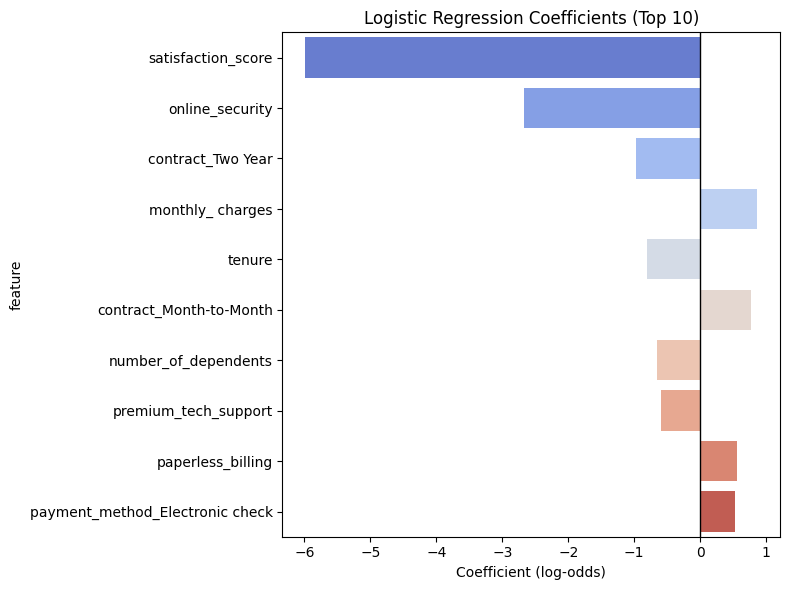

In [43]:
coef = lr.coef_.ravel()
features = X_train.columns

coef_df = pd.DataFrame({
    "feature": features,
    "coef": coef,
    "odds_ratio": np.exp(coef)
}).sort_values(by="coef", key=abs, ascending=False)

# Dataframe
print(coef_df.head(10))

# Plot top 10 features
plt.figure(figsize=(8,6))
sns.barplot(data=coef_df.head(10), x="coef", y="feature", palette="coolwarm")
plt.axvline(0, color="black", linewidth=1)
plt.title("Logistic Regression Coefficients (Top 10)")
plt.xlabel("Coefficient (log-odds)")
plt.tight_layout()
plt.show()

/tmp/ipykernel_22255/3265349254.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_importances, palette="viridis")


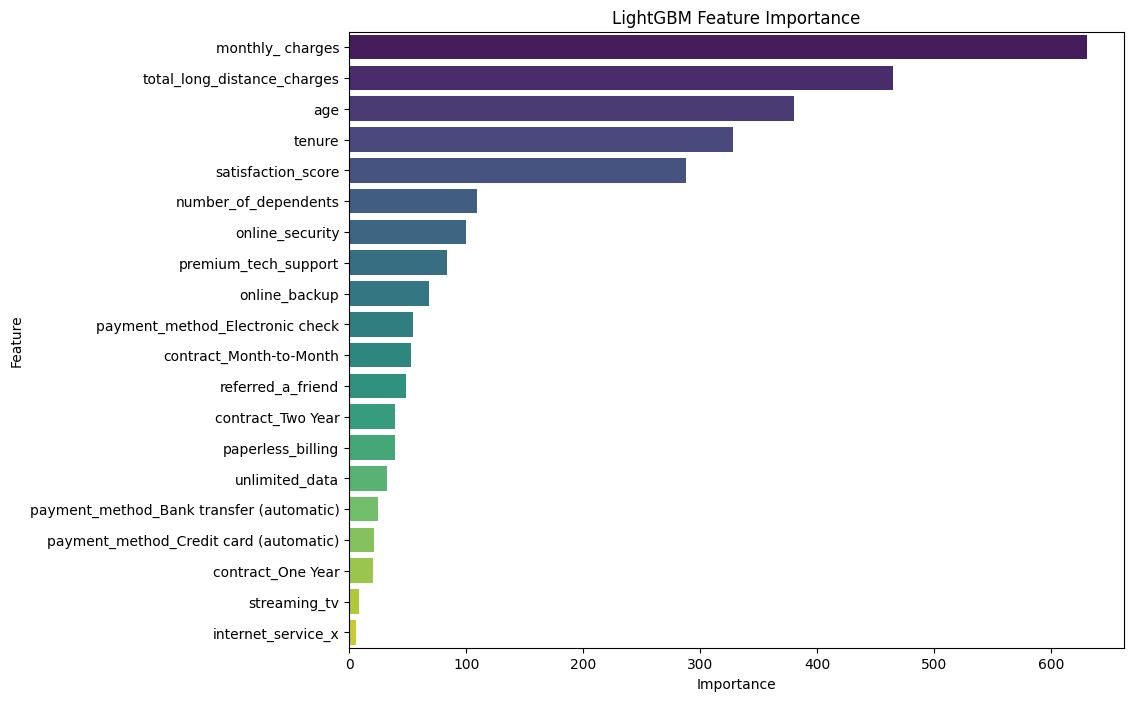

In [44]:
importances = tuned_lgbm.feature_importances_

# Buat dataframe biar rapi
feat_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,8))
sns.barplot(x="Importance", y="Feature", data=feat_importances, palette="viridis")
plt.title("LightGBM Feature Importance")
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


/tmp/ipykernel_22255/4153889715.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=perm_importances, palette="viridis")


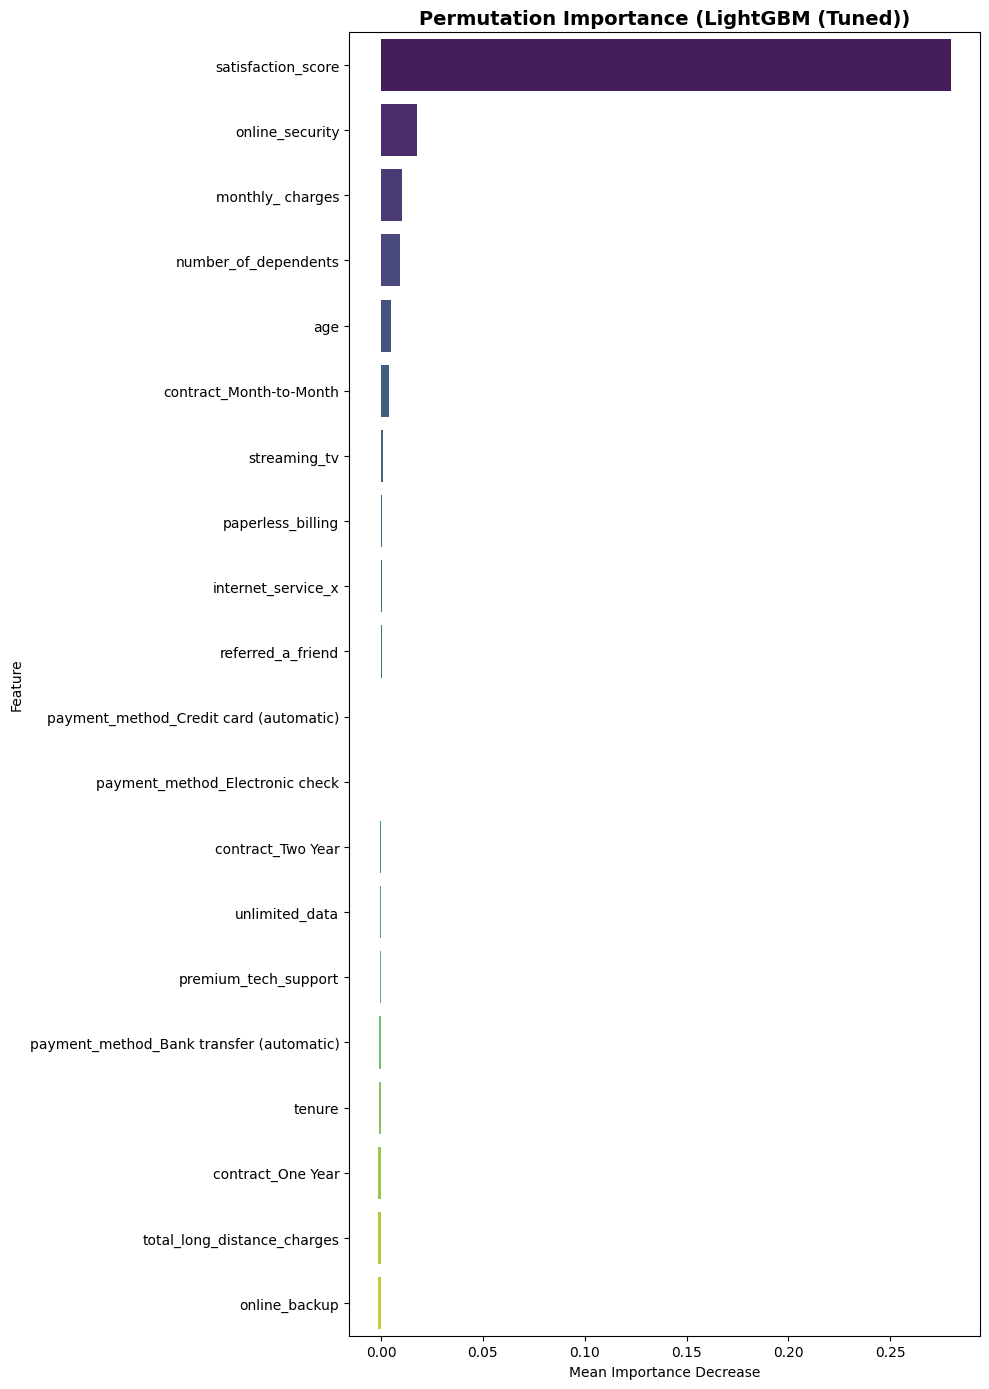

In [45]:
from sklearn.inspection import permutation_importance

# Select the best model
best_model = tuned_lgbm
best_model.fit(X_train, y_train)

# Compute permutation importance
result = permutation_importance(
    best_model,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

# Create DataFrame
perm_importances = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": result.importances_mean
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 14))
sns.barplot(x="Importance", y="Feature", data=perm_importances, palette="viridis")
plt.title("Permutation Importance (LightGBM (Tuned))", fontsize=14, weight="bold")
plt.xlabel("Mean Importance Decrease")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [46]:
feat_importances.head(20)

,Feature,Importance
6,monthly_ charges,631
4,total_long_distance_charges,465
19,age,380
2,tenure,328
0,satisfaction_score,288
7,number_of_dependents,109
11,online_security,100
13,premium_tech_support,84
16,online_backup,68
5,payment_method_Electronic check,55


In [47]:
perm_importances.head(20)

,Feature,Importance
0,satisfaction_score,0.279986
11,online_security,0.017885
6,monthly_ charges,0.010291
7,number_of_dependents,0.009226
19,age,0.004968
1,contract_Month-to-Month,0.003833
18,streaming_tv,0.000781
12,paperless_billing,0.000639
9,internet_service_x,0.000639
14,referred_a_friend,0.000426


Based on Logistic Regression and LightGBM Feature Importance, here are the features that that have high effect and makes sense in business setting:
- Satisfaction Score -> strongest predictor, unsatisfaction customer means churn.
- Monthly Charges -> more expensive the higher probability to churn
- Online Security -> those without protection are more likely to churn
- Dependents -> customers with family are more loyal
- Contract Type (MTM) -> monthly customers are more unstable Tenure -> early-stage customers are more likely to churn

## Simplified Features Model

In [48]:
features = [
    'satisfaction_score', 'monthly_ charges', 'online_security',
    'contract_Month-to-Month', 'contract_Two Year', 'contract_One Year',
    'number_of_dependents', 'tenure'
]

X_train_simp = X_train[features]
X_test_simp = X_test[features]

# Define Model
Best_Model_Simp = LGBMClassifier(class_weight='balanced', learning_rate=0.05, n_estimators=200,
               num_leaves=15, random_state=42)

# Initialize result list
results_final = []

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

prec_scores, rec_scores, f1_scores, auc_scores = [], [], [], []

for train_idx, val_idx in cv.split(X_train_simp, y_train):
    X_train_cv, X_val = X_train_simp.iloc[train_idx], X_train_simp.iloc[val_idx]
    y_train_cv, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Fit model
    Best_Model_Simp.fit(X_train_cv, y_train_cv)
    y_pred = Best_Model_Simp.predict(X_val)

    # Metrics
    prec_scores.append(precision_score(y_val, y_pred))
    rec_scores.append(recall_score(y_val, y_pred))
    f1_scores.append(f1_score(y_val, y_pred))
    auc_scores.append(roc_auc_score(y_val, y_pred))

# Test set
Best_Model_Simp.fit(X_train, y_train)

# Test Evaluation
y_pred_test = Best_Model_Simp.predict(X_test)
test_prec = precision_score(y_test, y_pred_test)
test_rec = recall_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)
test_auc = roc_auc_score(y_test, y_pred_test)

# Append result
results_final.append({
    "Model": "Simplified Features",
    "Train Precision": np.mean(prec_scores),
    "Test Precision": test_prec,
    "Train Recall": np.mean(rec_scores),
    "Test Recall": test_rec,
    "Train F1": np.mean(f1_scores),
    "Test F1": test_f1,
    "Test ROC-AUC": test_auc
})

# Dataframe
print("\nCross-Validation Result:")
results_df = pd.DataFrame(results_final)
results_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1197, number of negative: 3310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 4507, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1197, number of negative: 3310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number 

,Model,Train Precision,Test Precision,Train Recall,Test Recall,Train F1,Test F1,Test ROC-AUC
0,Simplified Features,0.878002,0.890625,0.929155,0.91689,0.902684,0.903567,0.938175


## Confusion Matrix and Classification Report

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      1036
           1       0.89      0.92      0.90       373

    accuracy                           0.95      1409
   macro avg       0.93      0.94      0.93      1409
weighted avg       0.95      0.95      0.95      1409

AUC-ROC: 0.9903

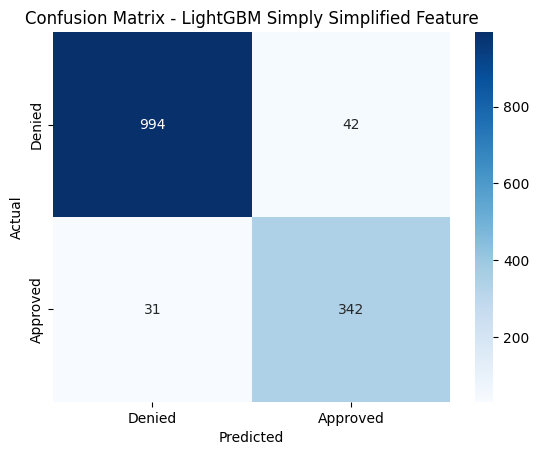

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Fit model
final_model = Best_Model_Simp
final_model.fit(X_train, y_train)

# Predict
y_pred = final_model.predict(X_test)
y_prob = final_model.predict_proba(X_test)[:, 1]

# Classification report & AUC
print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Denied", "Approved"],
            yticklabels=["Denied", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightGBM Simply Simplified Feature")
plt.show()

Despite using fewer features, the model perform almost identical with full feature. So, the model demonstrates strong predictive power, maintaining high recall, precision, and AUC.
- True Negative (TN): 994
- False Positive (FP): 42
- False Negative (FN): 31
- True Positive (TP): 342
  
-> The model detects churners well with a relatively low number of false negatives.
-  **0 (Not Churn)**
    -	`Precision = 0.97` -> the model nearly perfect in predicting customer not churn (very few false negatives).
    -	`Recall = 0.96` -> almost all customer are correctly detected by the model.
    -	`F1 = 0.96` -> excellent balance between precision and recall, showing very stable performance in identifying customer loyal (not churn).
-  **1 (Churn)**
    -	Precision = 0.89 -> among all customer predicted as churn, 89% are truly churn.
    -	Recall = 0.92 -> The model successfully captures the majority of high-risk customers, crucial for churn prevention strategies.
    -	F1 = 0.90 -> strong balance between precision and recall, indicating high reliability.
-  AUC-ROC = 0.99 -> Excellent ability to distinguish churn vs non-churn customers.

In [51]:
import joblib

# Save the final model
joblib.dump(best_model, '../models/final_churn_lgbm.pkl')

# Save encoders & scaler for later use during prediction
joblib.dump(label_encoders, '../models/label_encoders.pkl')
joblib.dump(ohe, '../models/onehot_encoder.pkl')
joblib.dump(scaler, '../models/robust_scaler.pkl')

print("Model & preprocessing objects saved successfully!")

Model & preprocessing objects saved successfully!


# Conclusion

1. Churn is strongly influenced by satisfaction score. It's more like customers with low satisfaction scores are 3x more likely to churn.

    -> Implement a proactive follow-up program for customers with declining satisfaction scores (<3).
    Create a structured “Satisfaction Recovery Program” that automatically flags customers with scores ≤ 3 for personalized outreach marketing

    **Impact:**
    Reducing dissatisfaction directly lowers churn for the largest at-risk group.

2. Customers without online security are significantly more likely to churn.

    -> Offer a 1-month free trial of online security to non subscribed customers, expecially those with high churn risk.

    Impact:
    Increases retention potential and unlocks upsell revenue opportunities.

3. Month-to-month customers are 2.17× more likely to churn (logistic regression odds ratio).

    -> Design a targeted incentive campaign to encourage conversion to annual contracts, such as:
    - 10% discount for 12-month upgrade
    - Bundled services
    - Loyalty points
    
    Impact: Stabilizes long-term revenue and reduces churn from the most unstable segment.

4. Higher monthly charges increase churn probability.

    -> Introduce flexible offer programs, such as:
    - Tiered discounts -> offer 10%, 15%, and 25% discounts based on subscription duration (e.g 6, 12, and 24 months).
    - Flexible billing options -> allow customer to switch between monthly and annual billing without penalties.
    - Optional service downgrades before cancellation

    Impact:Retain proce-sensitive customer without sacrificing overall revenue.

5. Customers with more dependents churn less (negative coefficient).

    -> Provide bundling and loyalty program:
    - Family packages -> offer multi account plans with shared discounts, such as add $30 per member (50% savings compared to registering individually).
    - Multi-account discounts -> 20% discount if customers register more than 2 accounts.
    - Referral bonuses (rewards) -> bill credit, free service days or discounts.

    Impact:Increases stickiness for low-risk customers while attracting similar profiles.

## Who should be prioritized for retention and determine the optimal cost threshold for retention strategies?

**How to calculate marketing cost**

The marketing budget should depend on churn potential, because without measurement, the company may overspend on retention efforts that are not profitable.

1. Expected Loss (the estimated financial value lost if a customer churns)
```
Expected Loss = probability(churn) x CLV
```
2. Maximum Marketing Offer

To ensure profitability, set a minimum profit margin (e.g., 20%) when determining how much the company can afford to spend to retain a customer.
```
Max Offer = Expected Loss × 0.8


In [52]:
# Predict probabilities
y_pred_proba = Best_Model_Simp.predict_proba(X_test)[:, 1]

# Create result df using X_test index
df_result = pd.DataFrame({
    "index": X_test.index,
    "prob_churn": y_pred_proba
})

# Merge dengan df asli untuk ambil customer_id & CLTV
df_result = df_result.merge(
    df[["customer_id", "cltv"]],
    left_on="index",
    right_index=True,
    how="left"
)

# Count expected loss & marketing cost
df_result["expected_loss"] = df_result["prob_churn"] * df_result["cltv"]

# Company wants minimum 20% margin
df_result["max_marketing_offer"] = df_result["expected_loss"] * 0.8

# Kategori rekomendasi
def offer_category(p):
    if p >= 0.80:
        return "High Retention Offer (25–35%)"
    elif p >= 0.60:
        return "Medium Offer (15–25%)"
    elif p >= 0.40:
        return "Light Offer (5–10%)"
    else:
        return "No Offer"

df_result["recommended_action"] = df_result["prob_churn"].apply(offer_category)

df_result.head()

,index,prob_churn,customer_id,cltv,expected_loss,max_marketing_offer,recommended_action
0,185,0.000224,0301-KOBTQ,3398,0.762415,0.609932,No Offer
1,2715,0.001214,3865-YIOTT,6283,7.625792,6.100634,No Offer
2,3825,0.001866,5377-NDTOU,4644,8.666617,6.933294,No Offer
3,1807,0.000433,2637-FKFSY,4047,1.751458,1.401166,No Offer
4,132,0.000264,0224-NIJLP,3899,1.028403,0.822723,No Offer


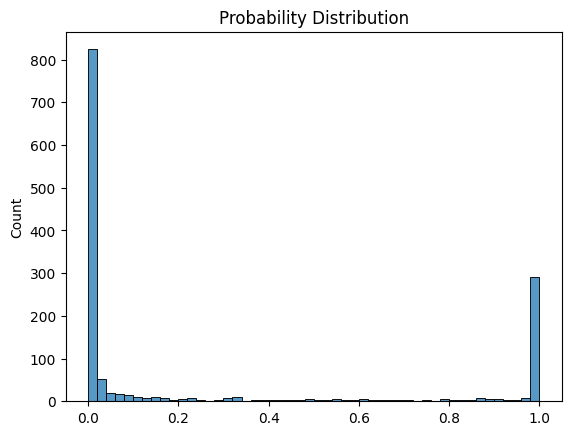

In [ ]:
sns.histplot(y_pred_proba, bins=50)
plt.title("Probability Distribution")
plt.show()